In [6]:
import numpy


In [7]:
import matplotlib


In [8]:
import pandas


In [9]:
import sympy

In [10]:
import scipy

<style>
.custom-spacing {
    line-height: 0.5;
}
</style>

### <center>*LAPORAN UJIAN TENGAH SEMESTER*</center>
### <center>*GEOFISIKA MATEMATIKA II dan Metode Komputasi I*</center>
#### <center>Disusun Untuk Memenuhi Nilai Ujian Tengah Semester</center>
#### <center>e</center>
<div style="text-align:center;">
  <img src="https://www.unhas.ac.id/wp-content/uploads/2022/09/Logo-Resmi-Unhas-1.png" alt="Deskripsi Gambar" style="width:280px;">
</div>

### <center>*DISUSUN OLEH :*</center>
### <center>*KELOMPOK 1B*</center>

#### <center> Gladiva Warouw (H061231061)<center>
#### <center> M.Padil Mangulele (H061231071)<center>
#### <center> Muh.Arjuna (H061231074)<center>

### <center>*PROGRAM STUDI GEOFISIKA*</center>
### <center>*FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM*</center>
#### <center>*UNIVERSITAS HASANUDDIN*</center>
#### <center>*MAKASSAR*</center>
#### <center>*2025*</center>



# Ordinary Differential Equations (ODE)

**Ordinary Differential Equations (ODE) atau Persamaan Diferensial Biasa** adalah persamaan yang melibatkan sebuah fungsi tak diketahui beserta turunan-turunannya terhadap **satu variabel bebas**.  

>



$$ \frac{dy}{dx} = f(x,y) $$


 3.1 PERSAMAAN DIFERENSIAL ORDE PERTAMA

## 3.1.1 Persamaan yang Dapat Dipisahkan (Separable Equations)

Sebuah persamaan diferensial orde satu dikatakan **dapat dipisahkan** jika dapat dituliskan sebagai

$$
g(y)\,dy = f(x)\,dx \tag{3.1.1}
$$

di mana variabel $x$ dan $y$ dapat dipisahkan sehingga masing-masing muncul di sisi yang berbeda dari persamaan diferensial. Solusi dari persamaan seperti ini dapat diperoleh dengan mengintegralkan kedua sisinya:

$$
\int g(y)\,dy = \int f(x)\,dx + c \tag{3.1.2}
$$

Dimana $c$ adalah konstanta integrasi.



**Persamaan yang tidak langsung separable**

Tidak semua persamaan diferensial orde satu langsung berbentuk separable.
Beberapa baru bisa dipisahkan setelah dilakukan substitusi variabel.

$$
y' = g\!\left(\frac{y}{x}\right) \tag{3.1.3}
$$

Dengan substitusi variabel:

$$
y = ux \quad \text{dengan} \quad y' = u + u' x 
\quad \left( \text{i.e., } \frac{dy}{dx} = u \frac{dx}{dx} + \frac{du}{dx}x \right), \tag{3.1.4}
$$

persamaan ini dapat dituliskan kembali sebagai:

$$
u + \frac{du}{dx}x = g(u) \quad ; \quad \frac{du}{dx}x = g(u) - u 
\quad ; \quad \frac{dx}{x} = \frac{du}{g(u) - u} \tag{3.1.5}
$$



Dengan demikian, variabel $x$ dan $u$ dapat dipisahkan sehingga solusi dari persamaan diferensial tersebut dapat diperoleh dengan mengintegralkan kedua sisinya dan mensubstitusi kembali $u = y/x$.


(Contoh 3.1) PD Terpisah (Separable DE)
## Soal
Tentukan solusi dari persamaan diferensial berikut dengan syarat awal:
$$
y' + 2xy = 0, \quad y(0) = 2
$$

 kita tulis kembali PD ini sebagai
$$
y' = \frac{dy}{dx} = -2xy \frac{dy}{y} = -2x \, dx $$
Dengan memisahkan variabel karena ingin mengubah ke bentuk separable. Maka

Pisahkan variabel:
$$
y' = \frac{dy}{dx} = -2xy
$$

$$
\frac{dy}{y} = -2x \, dx
$$

kenapa dipisah? agar bisa diintegralkan


lalu 
Integralkan kedua ruas:
$$
\int \frac{1}{y} \, dy = \int -2x \, dx
$$

Hasilnya:
$$
\ln |y| = -x^2 + c
$$


Bentuk Eksponensial
Ambil eksponensial pada kedua sisi:
$$
|y| = e^{-x^2 + c}
$$

Konstanta $e^c$ dapat digabung menjadi konstanta baru $C$:
$$
|y| = C e^{-x^2}
$$



Gunakan Kondisi Awal
Dengan $y(0) = 2$:
$$
2 = C e^{0} \quad \Rightarrow \quad C = 2
$$



Solusi Akhir
Sehingga solusi persamaan diferensial adalah:
$$
y = 2 e^{-x^2}
$$


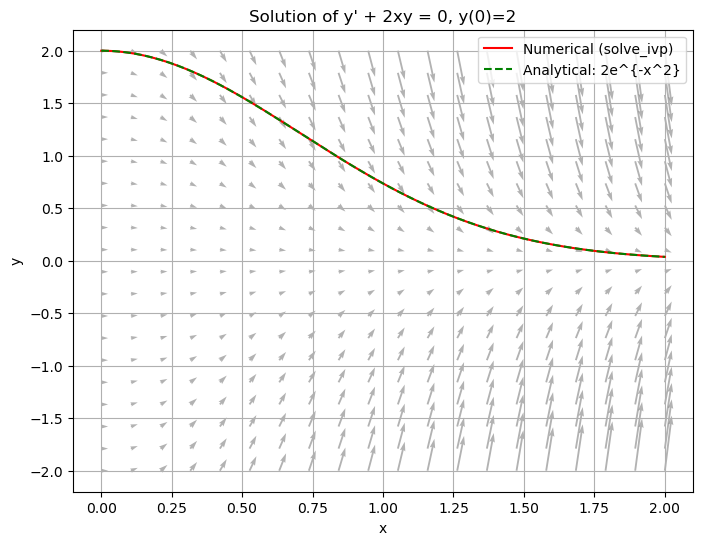

Relative error: 0.00016907081067546806


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definisi DE: y' = -2*x*y
def f(x, y):
    return -2 * x * y

# Interval solusi dan kondisi awal
x0, x_end = 0, 2
y0 = [2]  # harus dalam bentuk list untuk solve_ivp
x_span = (x0, x_end)

# === 1. Plot slope field ===
x_vals = np.linspace(x0, x_end, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U = np.ones_like(X)
V = -2 * X * Y

plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color="gray", alpha=0.6)

# === 2. Solusi numerik dengan solve_ivp ===
sol = solve_ivp(f, x_span, y0, t_eval=np.linspace(x0, x_end, 200))

plt.plot(sol.t, sol.y[0], "r", label="Numerical (solve_ivp)")

# === 3. Solusi analitik: y = 2 e^{-x^2} ===
x_analytic = np.linspace(x0, x_end, 200)
y_analytic = 2 * np.exp(-x_analytic**2)
plt.plot(x_analytic, y_analytic, "g--", label="Analytical: 2e^{-x^2}")

# === 4. Plot formatting ===
plt.title("Solution of y' + 2xy = 0, y(0)=2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# === 5. Hitung error relatif antara solusi numerik & analitik ===
error = np.linalg.norm(sol.y[0] - y_analytic) / np.linalg.norm(y_analytic)
print("Relative error:", error)


## 3.1.2 Persamaan Diferensial Eksak dan Faktor Integrasi  

Sebuah bentuk diferensial orde pertama  
Persamaan diferensial orde pertama $M(x,y)dx+N(x,y)dy=0$ disebut sebagai bentuk diferensial eksak (exact differential form) jika bersesuaian dengan (total atau eksak) diferensial dari suatu fungsi $F(x,y)$, yang disebut fungsi potensial (potential function), yaitu,
 

Jika kita menyamakan bentuk diferensial eksak dengan nol, diperoleh persamaan diferensial eksak:  

$$
M(x,y)dx + N(x,y)dy = 0 
$$  

dengan  

$$
M(x,y) = \frac{\partial F}{\partial x}, \quad N(x,y) = \frac{\partial F}{\partial y} \tag{3.1.7}
$$  

Di sini, kita memiliki syarat perlu dan cukup untuk suatu persamaan diferensial eksak:  

$$
M(x,y) = \frac{\partial F}{\partial x}, \quad N(x,y) = \frac{\partial F}{\partial y} \tag{3.1.8a,b}
$$  

$$
\iff \quad \frac{\partial M}{\partial y} = \frac{\partial^2 F}{\partial y \partial x} = \frac{\partial^2 F}{\partial x \partial y} = \frac{\partial N}{\partial x}, 
\quad ; \quad \frac{\partial M}{\partial y} = \frac{\partial N}{\partial x} \tag{3.1.9}
$$  

Kita dapat mengintegralkan kedua ruas persamaan ini untuk mendapatkan solusinya dalam bentuk implisit:  

$$
F(x,y) = c \tag{3.1.10}
$$  

Untuk beberapa persamaan diferensial sederhana seperti  

$$
y \, dx + x \, dy = 0 \tag{3.1.11}
$$  

mungkin mudah untuk menemukan $F(x,y)$ (dengan inspeksi), sehingga kita dapat menuliskan solusinya sebagai  

$$
xy = c \tag{3.1.12}
$$  

Namun, biasanya kita perlu mengambil prosedur berikut:  


### (Langkah 1)  
Anggap $y$ sebagai konstanta, integralkan  

$$
M(x,y) = \frac{\partial F}{\partial x}
$$  

terhadap $x$:  

$$
F(x,y) = \int M(x,y)dx + G(y) 
$$  

dengan $G(y)$ adalah “konstanta” integrasi.  




### (Langkah 2)  
Substitusikan Persamaan (3.1.13) ke dalam Persamaan (3.1.8b):  

$$
\frac{\partial}{\partial y} F(x,y) = \frac{\partial}{\partial y} \left( \int M(x,y)dx + G(y) \right) = N(x,y)
$$  

$$
\Rightarrow \frac{\partial}{\partial y} G(y) = N(x,y) - \frac{\partial}{\partial y} \left( \int M(x,y)dx \right) \tag{3.1.14}
$$  



### (Langkah 3)  
Integralkan Persamaan (3.1.14) untuk menemukan $G(y)$ lalu substitusikan ke dalam Persamaan (3.1.13).  






### (Contoh 3.4) Exact Differential Equation

Selesaikan  

$$
\frac{dy}{dx} + \frac{y^2 - 2x}{2xy+1} = 0 \quad \text{dengan } y(0)=1
\tag{E3.4.1}
$$

Kita dapat mengalikan kedua ruas dengan $(2xy+1)dx$ sehingga persamaan ini menjadi  

$$
Mdx + Ndy = (y^2 - 2x)dx + (2xy+1)dy = 0
\tag{E3.4.2}
$$

Perhatikan bahwa persamaan diferensial ini **eksak**, karena memenuhi syarat (3.1.9):  

$$
\frac{\partial M}{\partial y} = 2y = \frac{\partial N}{\partial x}
\tag{E3.4.3}
$$

Kita gunakan persamaan (3.1.13) untuk menuliskan  

$$
F(x,y) = \int M(x,y)dx + G(y) 
= \int (y^2 - 2x)dx + G(y) 
= xy^2 - x^2 + G(y)
\tag{E3.4.4}
$$

Selanjutnya disubstitusikan ke dalam persamaan (3.1.8b):  

$$
\frac{\partial}{\partial y} F(x,y) = N(x,y) 
$$

$$
2xy + \frac{\partial}{\partial y}G(y) = 2xy + 1 
$$

$$
\frac{\partial}{\partial y} G(y) = 1
$$

$$
G(y) = y
\tag{E3.4.5}
$$

Kita substitusikan $G(y)$ ke dalam persamaan (E3.4.4), kemudian masukkan hasilnya ke persamaan (3.1.10), sehingga solusi diperoleh:  

$$
F(x,y) = xy^2 - x^2 + y = c
$$

Dengan kondisi awal $y(0)=1$, maka  

$$
F(x,y) = xy^2 - x^2 + y = c = 1
\tag{E3.4.6}
$$


Max residual |F(x,y_num)-1| = 2.7725152507152018e-08


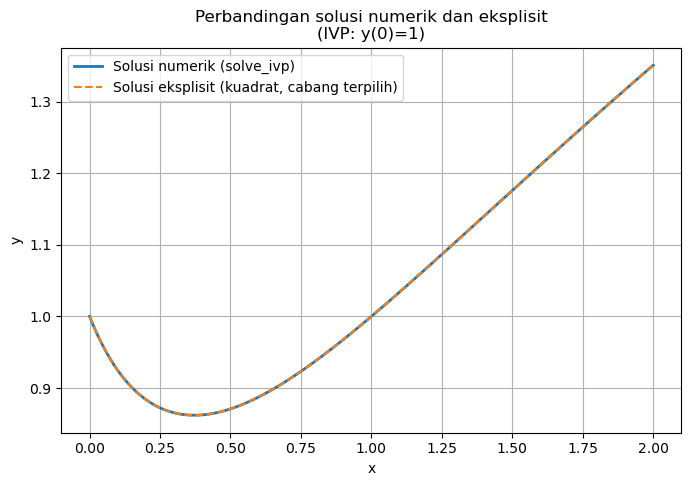

Max residual for explicit branch: 4.6629367034256575e-15


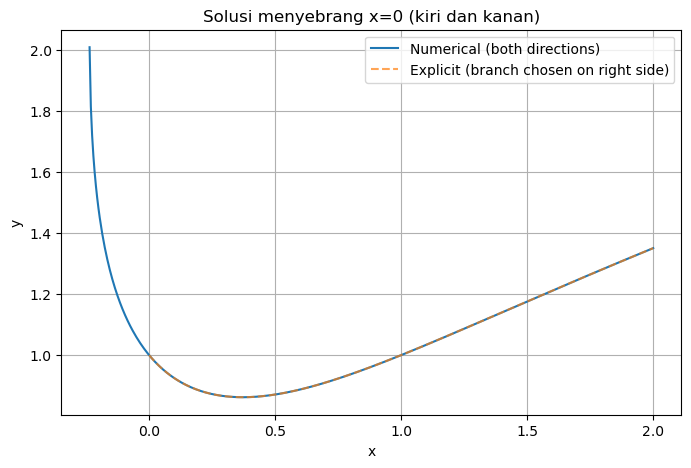

In [1]:
"""
Exact DE example (E3.4.1) — Python
ODE: dy/dx + (y^2 - 2x)/(2xy + 1) = 0,    y(0)=1
Implicit solution: x*y^2 - x^2 + y = 1
"""

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# RHS dari ODE: dy/dx = -(y^2 - 2x)/(2*x*y + 1)
def f(x, y):
    denom = 2*x*y + 1
    return -(y**2 - 2*x) / denom

# Domain untuk solusi numerik (ke kanan dan sedikit ke kiri)
x_span = (0.0, 2.0)    # dari x=0 ke x=2
x_eval = np.linspace(x_span[0], x_span[1], 400)

# kondisi awal
y0 = [1.0]

# Solve numerically
sol = solve_ivp(f, x_span, y0, t_eval=x_eval, rtol=1e-9, atol=1e-12, method='RK45')

# Implicit function F(x,y) = x*y^2 - x^2 + y
def F(x, y):
    return x*y**2 - x**2 + y

# Hitung residual F(x, y_num) - 1 untuk mengecek solusi numerik
residual = F(sol.t, sol.y[0]) - 1.0
print("Max residual |F(x,y_num)-1| =", np.max(np.abs(residual)))

# Sekarang hitung solusi eksplisit y_explicit(x) dengan rumus kuadrat (untuk x != 0)
def y_explicit_from_quad(x_vals):
    yroots = np.zeros((2, x_vals.size))
    for i, x in enumerate(x_vals):
        if abs(x) < 1e-14:
            # di x=0, solusi dari persamaan menjadi y=1
            yroots[0, i] = 1.0
            yroots[1, i] = 1.0
        else:
            a = x
            b = 1.0
            c = -(x**2 + 1.0)
            disc = b*b - 4*a*c
            # safe guard numerics:
            disc = max(disc, 0.0)
            sqrt_disc = np.sqrt(disc)
            yroots[0, i] = (-b + sqrt_disc) / (2*a)
            yroots[1, i] = (-b - sqrt_disc) / (2*a)
    # Pilih cabang yang paling mendekati y=1 (kontinuitas dari x=0)
    dist0 = np.abs(yroots[0, :] - 1.0)
    dist1 = np.abs(yroots[1, :] - 1.0)
    chosen = np.where(dist0 <= dist1, yroots[0, :], yroots[1, :])
    return chosen

y_explicit = y_explicit_from_quad(sol.t)

# Plot hasil
plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], label='Solusi numerik (solve_ivp)', lw=2)
plt.plot(sol.t, y_explicit, '--', label='Solusi eksplisit (kuadrat, cabang terpilih)', lw=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Perbandingan solusi numerik dan eksplisit\n(IVP: y(0)=1)')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi residual F(x,y_explicit)-1 untuk mengecek konsistensi
res_explicit = F(sol.t, y_explicit) - 1.0
print("Max residual for explicit branch:", np.max(np.abs(res_explicit)))

# Jika mau, dapat menyelesaikan juga agak ke kiri dari x=0 (negatif)
x_span_left = (0.0, -1.0)
x_eval_left = np.linspace(0.0, -1.0, 200)
sol_left = solve_ivp(f, x_span_left, y0, t_eval=x_eval_left, rtol=1e-9, atol=1e-12)
# Plot gabungan
plt.figure(figsize=(8,5))
plt.plot(np.concatenate((sol_left.t[::-1], sol.t)), np.concatenate((sol_left.y[0][::-1], sol.y[0])), label='Numerical (both directions)')
plt.plot(sol.t, y_explicit, '--', label='Explicit (branch chosen on right side)', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solusi menyebrang x=0 (kiri dan kanan)')
plt.legend()
plt.grid(True)
plt.show()


### 3.1.3 Persamaan Diferensial Orde Satu Linear

Pertimbangkan persamaan diferensial orde satu berikut:

$$
y' + a(x)y = f(x); \quad \frac{dy}{dx} + a(x)y = f(x), \quad y(0)=y_0
\tag{3.1.22}
$$

Karena koefisien $a$ hanya merupakan fungsi dari variabel bebas $x$, dan bukan variabel $y$, maka DE ini disebut **linear**.  
Jika koefisien $a$ bergantung pada $y$ (dan mungkin $x$), DE akan disebut **nonlinear**.  
Jika fungsi masukan $f(x)$ pada ruas kanan nol, maka DE linear disebut **homogen**; jika tidak, disebut **nonhomogen**.  

Persamaan (3.1.22) bukanlah exact DE, dapat ditulis ulang sebagai:

$$
(a(x)y - f(x))dx + dy = 0
$$

atau  

$$
Mdx + Ndy = 0, \quad M = a(x)y - f(x), \quad N=1; \quad 
\frac{\partial M}{\partial y} = a(x), \quad \frac{\partial N}{\partial x}=0
$$

Namun, karena $(M_y - N_x)/N = a(x)$ hanya fungsi dari $x$, maka kita dapat menjadikannya exact DE dengan mengalikan kedua ruas dengan **integrating factor**:

$$
\mu(x) = \exp \left\{ \int \frac{M_y - N_x}{N} dx \right\} = e^{\int a(x)dx}
$$

Sehingga:  

$$
e^{\int a(x)dx}\frac{dy}{dx} + e^{\int a(x)dx}a(x)y = e^{\int a(x)dx}f(x)
$$

atau  

$$
\frac{d}{dx} \left( e^{\int a(x)dx} y \right) = e^{\int a(x)dx} f(x)
\tag{3.1.23}
$$

Integrasikan kedua ruas, lalu bagi dengan integrating factor:  

$$
e^{\int a(x)dx} y = c + \int e^{\int a(x)dx} f(x) dx
$$

$$
y(x) = ce^{-\int a(x)dx} + e^{-\int a(x)dx} \int e^{\int a(x)dx} f(x) dx
\tag{3.1.24}
$$




### (Contoh 3.7) Linear First-Order DE dengan Koefisien Konstan

Selesaikan:  

$$
\frac{dy}{dx} + 2y = 4, \quad y(0)=1
\tag{E3.7.1}
$$

Gunakan persamaan (3.1.24):  

$$
y(x) = ce^{-\int 2 dx} + e^{-\int 2 dx} \int e^{\int 2 dx} (4) dx
$$

$$
y(x) = ce^{-2x} + e^{-2x} \int e^{2x} \cdot 4 dx
= ce^{-2x} + e^{-2x} \cdot 2e^{2x}
= ce^{-2x} + 2
\tag{E3.7.2}
$$

Tentukan konstanta $c$ dari kondisi awal $y(0)=1$:  

$$
y(0) = ce^{0} + 2 = 1 \quad \Rightarrow \quad c = -1
\tag{E3.7.3}
$$

Maka solusi akhirnya adalah:  

$$
y(x) = -e^{-2x} + 2
\tag{E3.7.4}
$$
